# The Euler-Cromer Method

## 0. Importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Introduction

This method is work for paired differential equations. <br><br>
&emsp; $\frac{dx}{dt}=f(t,v)$ &emsp; (1.1), <br>
&emsp; $\frac{dv}{dt}=g(t,x)$ &emsp; (1.2). <br><br>
The method is similar to the Euler, infact, this is modified version of the Euler method when you substitute vector of $Y$ instead of single function $y$ in the equation (1.1 *@The Euler notebook*). <br>
When the Euler method doesn't work, for example in the harmonic ocsillation differential equation, we use Euler-Cromer. Try it as an excersie ;)

In the Euler method, we solve (1.1) and (1.2) as:<br><br>
&emsp; $x_{n+1} = x_{n} + h \times f(t_n,v_n)$ &emsp; and &emsp; $v_{n+1} = v_{n} + h \times g(t_n,x_n)$ <br><br>
This approach doesn't work with some problems as we see divergence in the obtained solution. Ergo, we use a modified version of this approach as the following: <br><br>
&emsp; $x_{n+1} = x_{n} + h \times f(t_{n+1},v_{n+1})$ &emsp; and &emsp; $v_{n+1} = v_{n} + h \times g(t_n,x_n)$.

### 1.1 Falling object
An object falling in the gravity acceleration $g$ follows the following formula: <br><br>
&emsp; $\frac{d^2x}{dt^2} = g $. &emsp; (1.1.1) <br><br>
We can seperate (1.1.1) into two equations: <br><br>
&emsp; $\frac{dx}{dt}=v$ &emsp; and &emsp; $\frac{dv}{dt}=g$. &emsp; (1.1.2) <br><br>
Now lets solve this on ideal situation of earth (no frictions and $g=9.8$) with Euler-Cromer method and compare derived results with analytical solution.

**Analytic Solution** is the well-known free fall equation: <br>
$x(t) = -0.5gt^2 + x_0$

Text(0.5, 0, 'time')

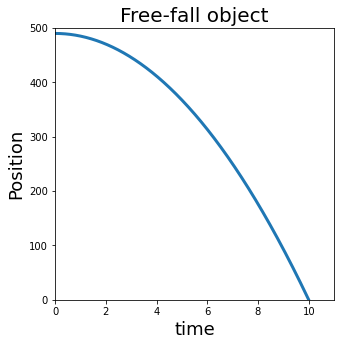

In [2]:
g = 9.8 # gravity acceleration
x_0 = 490 # Initial height
t_0 = 0
t_f = 10  # time needed an object reach the ground with 490 height (but you can put any time you wanted)
nt = 1000 # number of time points we want to evaluate x(t) between t_0 and t_f
t = np.linspace(t_0,t_f,nt)

def x_fall(g,x_0,t):
    return -0.5*g*t**2 + x_0

plt.figure(figsize=(5,5))
plt.title("Free-fall object", fontsize=20)
plt.plot(t,x_fall(g,x_0,t), lw=3)
plt.ylim(0,500)
plt.xlim(0,11)
plt.ylabel("Position" , fontsize=18)
plt.xlabel("time" , fontsize=18)

**Numerical solution**

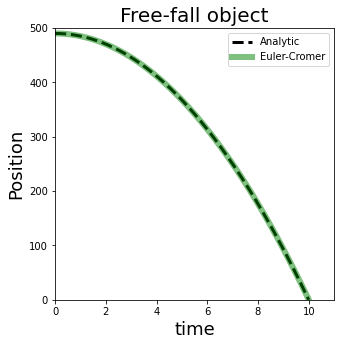

In [3]:
X = np.empty(nt)
V = np.empty(nt)
h = (t_f - t_0)/nt
X[0] = 490 # Initial condition
V[0] = 0   # Initial condition

for i in range(0,nt-1):
    V[i+1] = V[i] + h*(-g)
    X[i+1] = X[i] + V[i+1]*h
    
plt.figure(figsize=(5,5))
plt.title("Free-fall object", fontsize=20)
plt.plot(t,x_fall(g,x_0,t), lw=3 , color = "k", linestyle="dashed", label="Analytic")
plt.plot(t,X, lw=6 , color = "g", alpha=0.5, label="Euler-Cromer")
plt.ylim(0,500)
plt.xlim(0,11)
plt.ylabel("Position" , fontsize=18)
plt.xlabel("time" , fontsize=18)
plt.legend()

**You can easily test this method for a simple Harmonic oscillator problem.**